<img src="images/pythonpanda.jpg" width=300 align="right">

# Data Analysis and Basic Visualisation in Python 

In this notebook we'll go through some basic data analysis techniques using the Pandas package as well as some basic, exploratory plotting using the Matplotlib package. 

As always, let's first import the modules we'll be using. 

*Image from medium.com*

In [1]:
# data analysis packages 
import glob
from datetime import datetime
import pandas as pd
import numpy as np 

# plotting packages 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Reading in and pre-processing data

For this exercise we have three separate .csv files we need to work with. These are the 15-minuted river discharge data from the River Conwy, North Wales from Natural Resources Wales. They have arrived in three separate csv file. 

We can use the pandas ```read_csv``` function to read these in easily.  

*Tip: there are extra arguments with most functions. Below we are using 'header' to tell the function that there are 20 header lines which don't need to be read in and 'encoding' to avoid encoding UTF errors when loading in.*

In [2]:
flow1 = pd.read_csv(r'data\Cwmlanerch_FlowData.csv',encoding='latin1',header=20)
flow2 = pd.read_csv(r'data\Cwmlanerch_FlowData01.csv',encoding='latin1',header=20)
flow3 = pd.read_csv(r'data\Cwmlanerch_FlowData02.csv',encoding='latin1',header=20)

Using the ```.head()``` function for Pandas Dataframes we can check the data is as expected and has been read in correctly.

In [3]:
flow1.head()

,Time stamp,Value [m³/s],State of value,Runoff [l/s/km²],Quality (Runoff),Tags,Remarks
0,01/01/2011 00:00:00,11.5391,1064 (40 (G) calc),33.4951,1064 (40 (G) calc),[WR],extrapolated (upper part)
1,01/01/2011 00:15:00,11.5391,1064 (40 (G) calc),33.4951,1064 (40 (G) calc),[WR],extrapolated (upper part)
2,01/01/2011 00:30:00,11.4996,1064 (40 (G) calc),33.3807,1064 (40 (G) calc),[WR],extrapolated (upper part)
3,01/01/2011 00:45:00,11.4603,1064 (40 (G) calc),33.2665,1064 (40 (G) calc),[WR],extrapolated (upper part)
4,01/01/2011 01:00:00,11.4603,1064 (40 (G) calc),33.2665,1064 (40 (G) calc),[WR],extrapolated (upper part)


Since we want to be doing some analysis on the whole timeseries, its actually not that useful to have three separate DataFrames. It's best to combine these data frames together. 

Instead of reading all the files in separately we can read them all in at the same time saving a lot of time. To do this, we first have to identify the files we need in our data folder using the command ```glob.glob```.

In [4]:
# this identifies all the .csv files that start with Cwmlanerch_FlowData in our folder
#   and stores them as strings to use later. 
csv_files = glob.glob(r'data\Cwmlanerch_FlowData*.{}'.format('csv'))

Using a **for loop** we can now read in the csv files using the ```read_csv``` function and concatenate them to each other using the ```concat``` function.

*Tip: the ```ignore_index=True``` argument allows the function to re-index eveything from 0 to n-1. If you want to keep the original indexing make sure to use the flag ```False```.

In [5]:
flow_df = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file,encoding='latin1',header=20)
            flow_df = pd.concat([flow_df, df_temp], ignore_index=True)
flow_df

,Time stamp,Value [m³/s],State of value,Runoff [l/s/km²],Quality (Runoff),Tags,Remarks
0,01/01/2011 00:00:00,11.5391,1064 (40 (G) calc),33.4951,1064 (40 (G) calc),[WR],extrapolated (upper part)
1,01/01/2011 00:15:00,11.5391,1064 (40 (G) calc),33.4951,1064 (40 (G) calc),[WR],extrapolated (upper part)
2,01/01/2011 00:30:00,11.4996,1064 (40 (G) calc),33.3807,1064 (40 (G) calc),[WR],extrapolated (upper part)
3,01/01/2011 00:45:00,11.4603,1064 (40 (G) calc),33.2665,1064 (40 (G) calc),[WR],extrapolated (upper part)
4,01/01/2011 01:00:00,11.4603,1064 (40 (G) calc),33.2665,1064 (40 (G) calc),[WR],extrapolated (upper part)
...,...,...,...,...,...,...,...
311227,16/11/2019 22:45:00,23.7002,1224 (200 (U) calc),68.7960,1224 (200 (U) calc),[WR],NaN
311228,16/11/2019 23:00:00,23.5817,1224 (200 (U) calc),68.4520,1224 (200 (U) calc),[WR],NaN
311229,16/11/2019 23:15:00,23.5226,1224 (200 (U) calc),68.2804,1224 (200 (U) calc),[WR],NaN
311230,16/11/2019 23:30:00,23.3457,1224 (200 (U) calc),67.7669,1224 (200 (U) calc),[WR],NaN


*Tip: It's considered best practice to have column names with no spaces as it allows you to use the '.' notation on the columns and query them without issue. You can change the names of the columns in a dataframe by using the dictionary data structure and the function ```.rename()```:*

In [6]:
flow_df = flow_df.rename(columns={'Time stamp':'Time','Value [m³/s]':'Value','State of value':'State','Runoff [l/s/km²]':'Runoff','Quality (Runoff)':'Quality'})
flow_df.head()

,Time,Value,State,Runoff,Quality,Tags,Remarks
0,01/01/2011 00:00:00,11.5391,1064 (40 (G) calc),33.4951,1064 (40 (G) calc),[WR],extrapolated (upper part)
1,01/01/2011 00:15:00,11.5391,1064 (40 (G) calc),33.4951,1064 (40 (G) calc),[WR],extrapolated (upper part)
2,01/01/2011 00:30:00,11.4996,1064 (40 (G) calc),33.3807,1064 (40 (G) calc),[WR],extrapolated (upper part)
3,01/01/2011 00:45:00,11.4603,1064 (40 (G) calc),33.2665,1064 (40 (G) calc),[WR],extrapolated (upper part)
4,01/01/2011 01:00:00,11.4603,1064 (40 (G) calc),33.2665,1064 (40 (G) calc),[WR],extrapolated (upper part)


We can now delete the three data frames we loaded in earlier to make sure we are keeping a tidy workspace by using the command ```del```.

In [7]:
del flow1, flow2, flow3

We can now read in one of the columns of the data frame to its own separate variable. Using the ```type()``` function we can see that the 'Time' column is saved as a **series** of **strings**

In [8]:
time = flow_df['Time']
print(type(time[0]),type(time))

<class 'str'> <class 'pandas.core.series.Series'>


To make things easier, we can instead read in a column of our DataFrame and convert it to datetime objects, making it easier to perform time series analyses. We can do this by using the pandas function ```to_datetime```.

In [9]:
time = pd.to_datetime(flow_df['Time'], format='%d/%m/%Y %H:%M:%S')
print(type(time[0]),type(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas.core.series.Series'>


Now let's save the flow rate discharge as it's own variable. 

In [10]:
flow = flow_df['Value'] # query column with name 
# flow = flow_df.iloc[:,1] # query column with position

Plotting is a large part of exploratory data analysis. We can quickly plot data to check what it looks like and it's what we're expecting using matplotlib's ```plt.plot``` function. 

*Tip: if you aren't using a notebook interface where figures automatically output below the codeblock you'll need to add an additional line of code with the command ```plt.show()``` to view the figure window.*

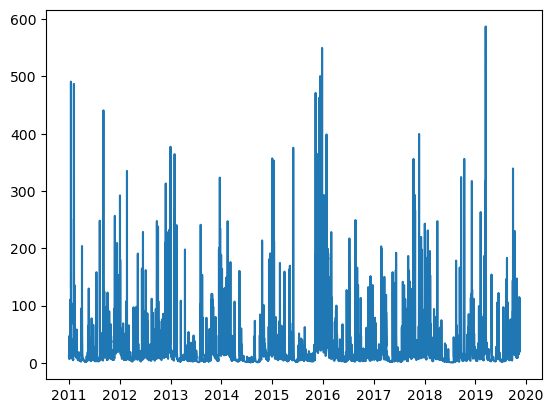

In [11]:
plt.plot(time,flow)
#plt.show

## Descriptive Statistics and Basic Analysis 

Using the numpy package we can easily start to investigate the dataset using descriptive statistics. We can find the maximum, minimum, mean for example using the commands ```np.max()```, ```np.min()```, and ```np.mean()```. 

In [12]:
print(np.max(flow))
print(np.min(flow))
print(np.mean(flow))

587.306
0.500092
20.52529912683786


Finding where certain values are within a DataFrame is a common need. We can do this with a mixture of the numpy ```where``` function and boolean operators. Here we want to find the location (index) of the maximum value in the dataset. 

*Note: ```np.where``` can also output multiple locations (e.g you can query the locations where flow is greater than 100 cumecs and the outputted array would include multiple location indices* 

In [13]:
maxFlow = np.where(flow == np.max(flow)) # find where in the dataset the maximum value is
print(maxFlow)

(array([287676], dtype=int64),)


We can now quickly visualise whether that command has worked by placing a red dot at that location. 

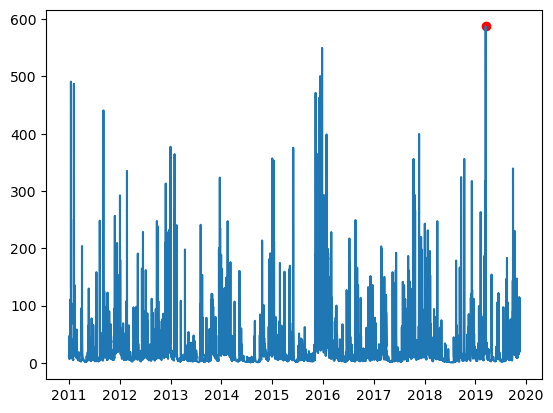

In [14]:
plt.plot(time,flow)
plt.scatter(time[maxFlow[0]],flow[maxFlow[0]],color='red')

**Calculating Rolling Averages**

We now need to find the wettest and dryest 30-day period in the data set. We can do this by setting up a moving average. 

The timestep of the dataset is 15 minutes. So first we have to find out how many 15 minute chunks are in one month. We'll save it to a variable called ```window_size```

In [15]:
window_size = 4*24*30 # can't start a variable name with a number 
print(window_size)

2880


Now we know there are 2880 timesteps in a 30 day period we can initialise and perform the moving averages calculation.

In [16]:
# Get the window of series of specified window size
windows = flow.rolling(window_size)
  
# Create a series of moving
# averages of each window
moving_averages = windows.mean()
  
# Convert pandas series back to list
moving_averages_list = moving_averages.tolist()
  
# The rolling mean needs 30 days worth of data to work and so the moving_averages_list has 
# 30-days worth of nan values at the beginning of the dataset e.g 
moving_averages_list[:11]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

We can now find the location of the **end** of the dryest month. We then need to add the difference back onto the value so it matches our original dataset. 

Since we have nans present in our dataset ```np.min()``` will return the nan value. We need to use the ```np.nanmin()``` to discount all of the nan values at the start of the dataset. 

In [17]:
dryest = np.where(moving_averages_list == np.nanmin(moving_averages_list))
dryest

(array([265580], dtype=int64),)

In [18]:
wettest = np.where(moving_averages_list == np.nanmax(moving_averages_list))
wettest

(array([174885], dtype=int64),)

We can now quickly plot the locations of each requirement and check whether this looks roughly right. Since the ```np.where()``` function gives us an array we'll have to index the first value (position 0). 

*Tip: the ```zorder=-1``` argument within matplotlib plots moves the plot behind all other objects plotted*

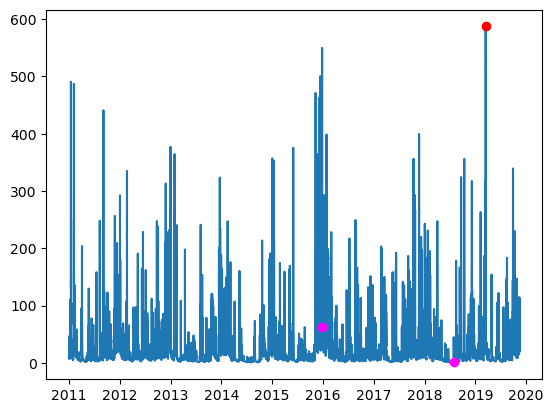

In [19]:
plt.plot(time,flow,zorder=-1)
plt.scatter(time[maxFlow[0]],flow[maxFlow[0]],color='red')
plt.scatter(time[dryest[0]],flow[dryest[0]],color='magenta')
plt.scatter(time[wettest[0]],flow[wettest[0]],color='magenta')

## Selecting and Exporting Data 

We can now begin to isolate the periods of time we need, through finding their positions within the wider dataset. To be able to use a position as an index it has to be an integer, so we have to use the ```int()``` function to convert it from a float. It also has to be within square brackets ```[ ]```.

In [20]:
minDryLoc = int(dryest[0]-window_size)
maxDryLoc = int(dryest[0])

minWetLoc = int(wettest[0]-window_size)
maxWetLoc = int(wettest[0])

MaxFlowLoc_min = int(maxFlow[0]-window_size/2)
MaxFlowLoc_max = int(maxFlow[0]+window_size/2)

Let's see if these indexes work through making three quick plots of the three periods of time we need. 

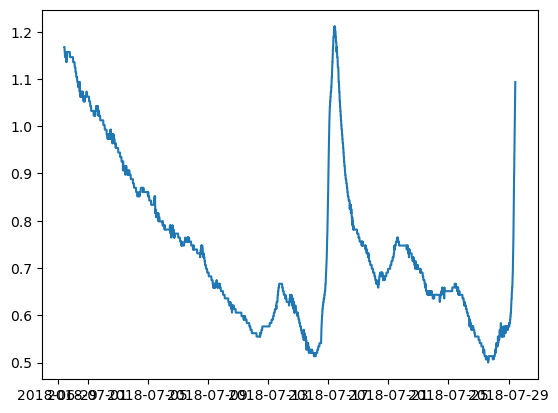

In [21]:
plt.plot(time[minDryLoc:maxDryLoc],flow[minDryLoc:maxDryLoc])

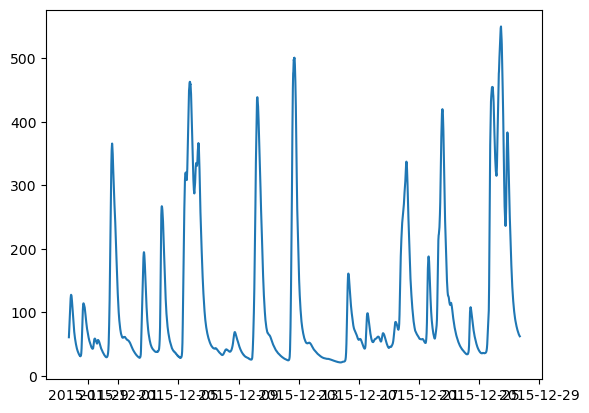

In [22]:
plt.plot(time[minWetLoc:maxWetLoc],flow[minWetLoc:maxWetLoc])

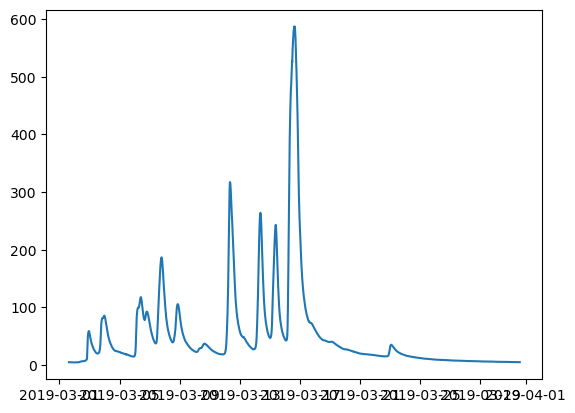

In [23]:
plt.plot(time[MaxFlowLoc_min:MaxFlowLoc_max],flow[MaxFlowLoc_min:MaxFlowLoc_max])

Now we're confident we've correctly isolate the correct time periods we can turn them back into individual DataFrames and easily export them as a .csv file for later use. 

In [24]:
# create data frames to export to csv 

# wettest 
dict_wettest = {'Time':time[minWetLoc:maxWetLoc],'Flow':flow[minWetLoc:maxWetLoc]}
wettest_df = pd.DataFrame(dict_wettest)
print(wettest_df)
# wettest_df.to_csv('wettest.csv')

# # dryest 
dict_dryest = {'Time':time[minDryLoc:maxDryLoc],'Flow':flow[minDryLoc:maxDryLoc]}
dryest_df = pd.DataFrame(dict_dryest)
# dryest_df.to_csv('dryest.csv')

# # max flow 
dict_maxFlow = {'Time':time[MaxFlowLoc_min:MaxFlowLoc_max],'Flow':flow[MaxFlowLoc_min:MaxFlowLoc_max]}
maxFlow_df = pd.DataFrame(dict_maxFlow)
# maxFlow_df.to_csv('maxFlow.csv')

                      Time     Flow
172005 2015-11-27 17:15:00  60.8466
172006 2015-11-27 17:30:00  66.6776
172007 2015-11-27 17:45:00  72.1279
172008 2015-11-27 18:00:00  77.9286
172009 2015-11-27 18:15:00  83.7054
...                    ...      ...
174880 2015-12-27 16:00:00  64.0246
174881 2015-12-27 16:15:00  63.4780
174882 2015-12-27 16:30:00  63.1139
174883 2015-12-27 16:45:00  62.7502
174884 2015-12-27 17:00:00  62.3869

[2880 rows x 2 columns]


## Plotting using the matplotlib package 

Now the plots above are definitely not as good as they can be. We can use the matplotlib package to control every section of our plots. In this case, it would be good to create a subplot; a hydrograph for each scenario. 

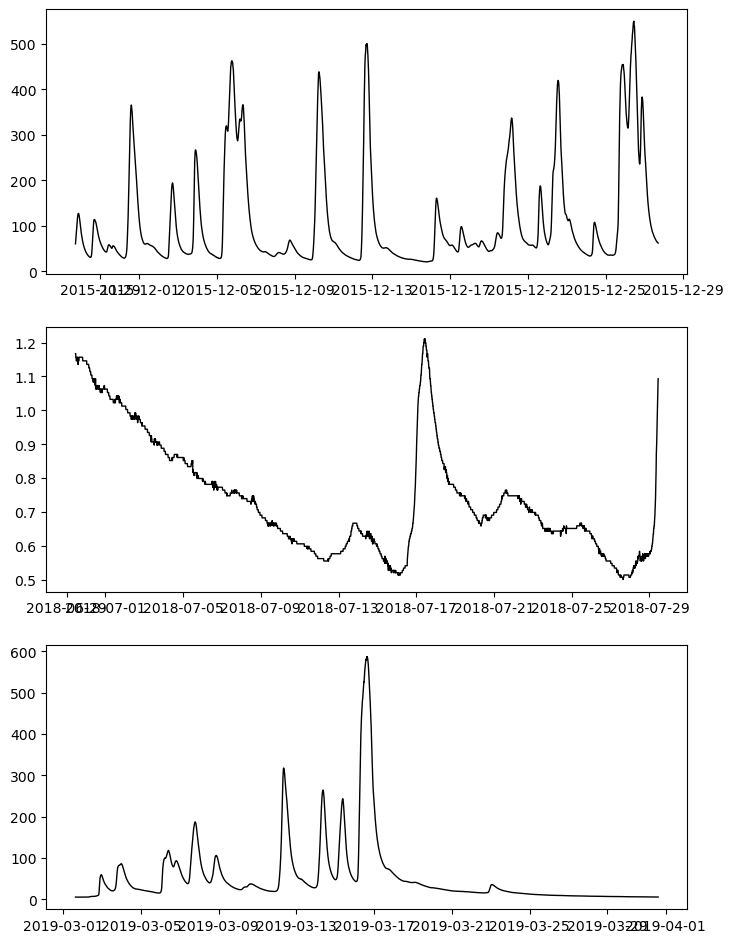

In [25]:
fig,axes = plt.subplots(3,1)
fig.set_size_inches(8.27, 11.69) # half an a4 page 
ax0=axes[0]
ax1=axes[1]
ax2=axes[2]

# wettest subplot 

wettest_plot = ax0.plot(wettest_df['Time'], wettest_df['Flow'],color='black',linewidth=1)

# dryest subplot

dryest_plot = ax1.plot(dryest_df['Time'], dryest_df['Flow'],color='black',linewidth=1)

# max flow subplot

maxFlow_plot = ax2.plot(maxFlow_df['Time'], maxFlow_df['Flow'],color='black',linewidth=1)


We can set the limits of the y and x axes by using the ```.set_ylim``` and ```.set_xlim```. 

*Note: This is different if you're creating one single plot. You can just use ```.xlim``` or ```.ylim``` instead* 

(0.0, 600.0)

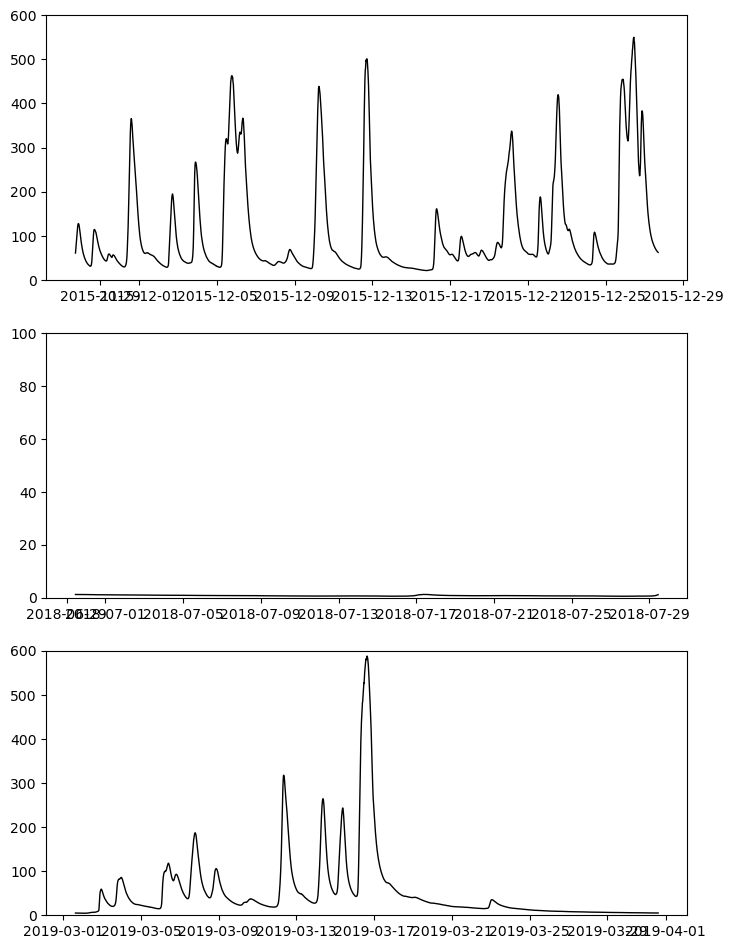

In [26]:
fig,axes = plt.subplots(3,1)
fig.set_size_inches(8.27, 11.69) # half an a4 page 
ax0=axes[0]
ax1=axes[1]
ax2=axes[2]

# wettest subplot 

wettest_plot = ax0.plot(wettest_df['Time'], wettest_df['Flow'],color='black',linewidth=1)
ax0.set_ylim([0,600])

# dryest subplot

dryest_plot = ax1.plot(dryest_df['Time'], dryest_df['Flow'],color='black',linewidth=1)
ax1.set_ylim([0,100])

# max flow subplot

maxFlow_plot = ax2.plot(maxFlow_df['Time'], maxFlow_df['Flow'],color='black',linewidth=1)
ax2.set_ylim([0,600])


Easily add text using the ```.text``` command and axes labels using the ```.set_ylabel``` command.

Text(17957, 550, 'c')

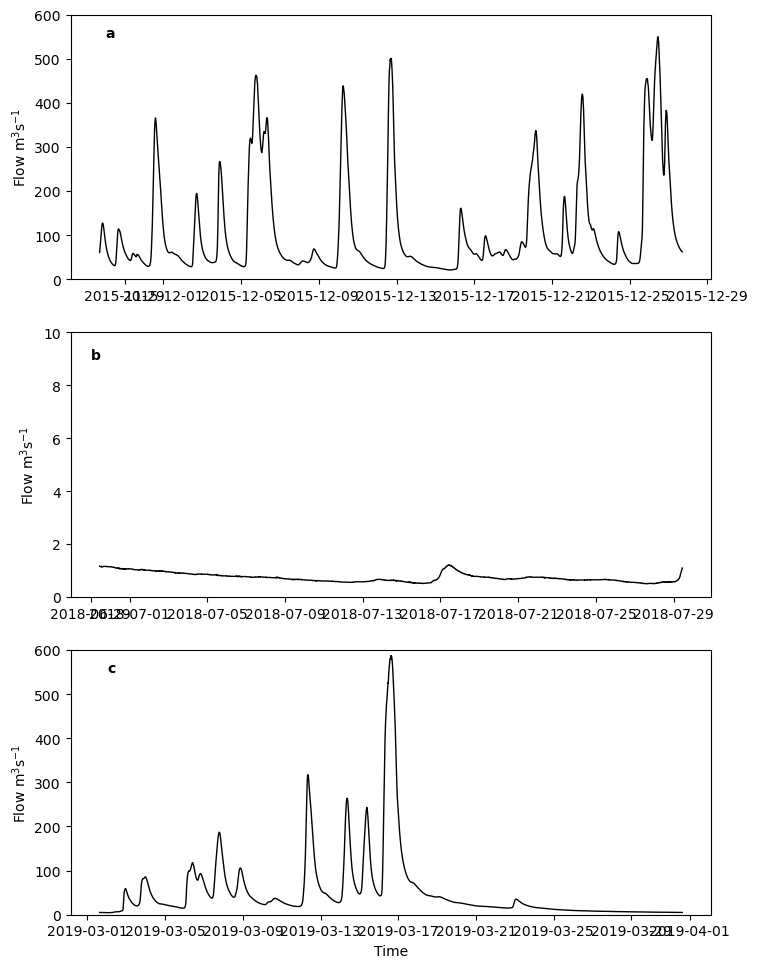

In [27]:
fig,axes = plt.subplots(3,1)
fig.set_size_inches(8.27, 11.69) # half an a4 page 
ax0=axes[0]
ax1=axes[1]
ax2=axes[2]

# wettest subplot 

wettest_plot = ax0.plot(wettest_df['Time'], wettest_df['Flow'],color='black',linewidth=1)
ax0.set_ylim([0,600])
ax0.set_ylabel('Flow m$^3$s$^{-1}$')
ax0.text(16767,550,'a',fontweight='bold')

# dryest subplot

dryest_plot = ax1.plot(dryest_df['Time'], dryest_df['Flow'],color='black',linewidth=1)
ax1.set_ylim([0,10])
ax1.set_ylabel('Flow m$^3$s$^{-1}$')
ax1.text(17711,9,'b',fontweight='bold')

# max flow subplot

maxFlow_plot = ax2.plot(maxFlow_df['Time'], maxFlow_df['Flow'],color='black',linewidth=1)
ax2.set_ylim([0,600])
ax2.set_xlabel('Time')
ax2.set_ylabel('Flow m$^3$s$^{-1}$')
ax2.text(17957,550,'c',fontweight='bold')

Set some x tick parameters so the dates aren't overlapping. Here, were changing the format of the date and rotating the labels 45 degrees. 

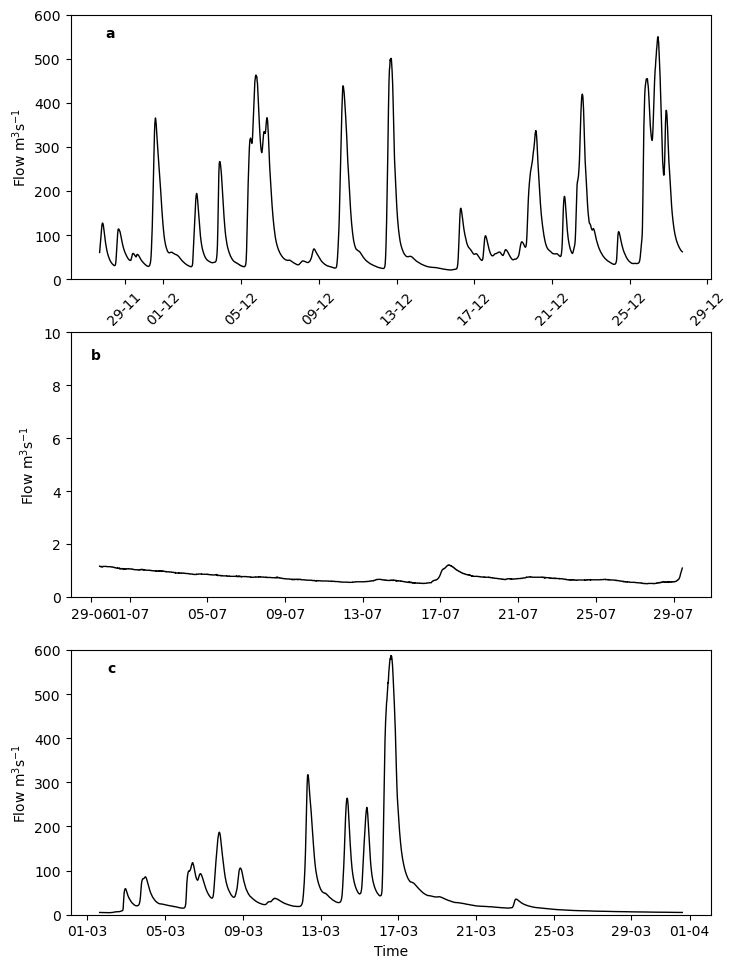

In [28]:
fig,axes = plt.subplots(3,1)
fig.set_size_inches(8.27, 11.69) # half an a4 page 
ax0=axes[0]
ax1=axes[1]
ax2=axes[2]

# wettest subplot 

wettest_plot = ax0.plot(wettest_df['Time'], wettest_df['Flow'],color='black',linewidth=1)
ax0.set_ylim([0,600])
ax0.set_ylabel('Flow m$^3$s$^{-1}$')
ax0.text(16767,550,'a',fontweight='bold')
dfmt = mdates.DateFormatter("%d-%m") # proper formatting Year-month-day
ax0.xaxis.set_major_formatter(dfmt)
# ax0.tick_params(rotation=45)
plt.setp(ax0.xaxis.get_majorticklabels(), rotation=45);

# dryest subplot

dryest_plot = ax1.plot(dryest_df['Time'], dryest_df['Flow'],color='black',linewidth=1)
ax1.set_ylim([0,10])
ax1.set_ylabel('Flow m$^3$s$^{-1}$')
ax1.text(17711,9,'b',fontweight='bold')
ax1.xaxis.set_major_formatter(dfmt)
# ax1.tick_params(rotation=45)
plt.setp(ax0.xaxis.get_majorticklabels(), rotation=45);

# max flow subplot

maxFlow_plot = ax2.plot(maxFlow_df['Time'], maxFlow_df['Flow'],color='black',linewidth=1)
ax2.set_ylim([0,600])
ax2.set_xlabel('Time')
ax2.set_ylabel('Flow m$^3$s$^{-1}$')
ax2.text(17957,550,'c',fontweight='bold')
ax2.xaxis.set_major_formatter(dfmt)
# ax2.tick_params(rotation=45)
plt.setp(ax0.xaxis.get_majorticklabels(), rotation=45);


## More Dataframe Manipulation: 'Groupby' functions

In [29]:
flow_df['Time'] = pd.to_datetime(flow_df['Time'])
flow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311232 entries, 0 to 311231
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Time     311232 non-null  datetime64[ns]
 1   Value    311232 non-null  float64       
 2   State    311232 non-null  object        
 3   Runoff   311232 non-null  float64       
 4   Quality  311232 non-null  object        
 5   Tags     311232 non-null  object        
 6   Remarks  126146 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 16.6+ MB


Time
04    12.180347
07    13.880007
05    14.687443
06    16.552827
03    17.012812
08    18.597669
09    20.770272
02    21.117026
10    23.276769
01    26.026394
11    26.964648
12    36.526084
Name: Value, dtype: float64


<AxesSubplot: xlabel='Time'>

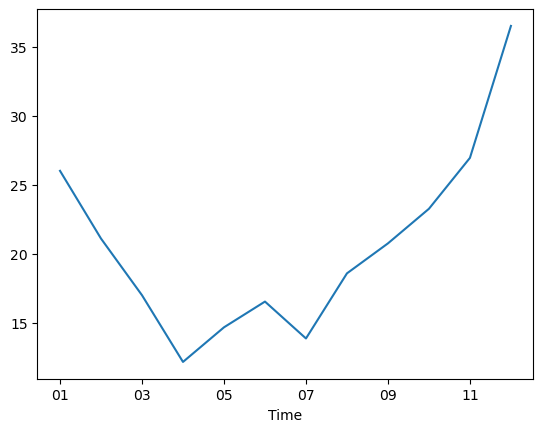

In [30]:
monthly_flow = flow_df.groupby(flow_df['Time'].dt.strftime('%m'))['Value'].mean()
print(monthly_flow.sort_values())
monthly_flow.plot()

In [31]:
sns.set_style("darkgrid")

Text(0.5, 0, 'Month')

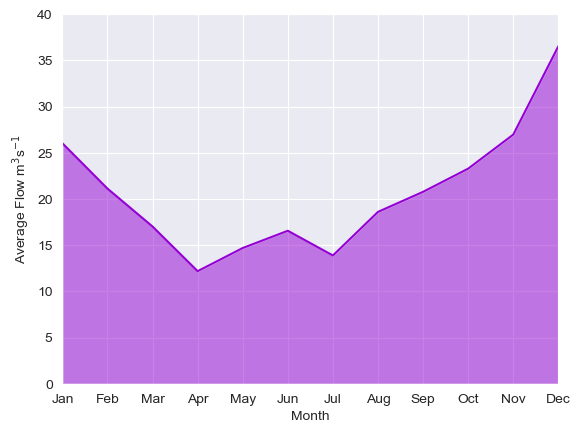

In [32]:
fig = plt.figure()
ax = plt.axes()

# monthly_flow.plot(ax=ax)
sns.lineplot(data=monthly_flow,x='Time',y=monthly_flow,color='darkviolet')

plt.xticks(np.arange(0,12),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.fill_between(np.arange(0,12),monthly_flow,0,facecolor='darkviolet',alpha=0.5)

plt.xlim([0,11])
plt.ylim([0,40])

plt.ylabel('Average Flow m$^3$s$^{-1}$')
plt.xlabel('Month')
